# Importación de librerías

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Metadata

**client_id**: Every client’s unique ID.

**variation**: Indicates if a client was part of the experiment.

**visitor_id**: A unique ID for each client-device combination.

**visit_id**: A unique ID for each web visit/session.

**process_step**: Marks each step in the digital process.

**date_time**: Timestamp of each web activity.

**clnt_tenure_yr**: Represents how long the client has been with Vanguard, measured in years.

**clnt_tenure_mnth**: Further breaks down the client’s tenure with Vanguard in months.

**clnt_age**: Indicates the age of the client.

**gendr**: Specifies the client’s gender.

**num_accts**: Denotes the number of accounts the client holds with Vanguard.

**bal**: Gives the total balance spread across all accounts for a particular client.

**calls_6_mnth**: Records the number of times the client reached out over a call in the past six months.

**logons_6_mnth**: Reflects the frequency with which the client logged onto Vanguard’s platform over the last six months.


# EDA & DC: Carga y análisis de los dataframes

In [76]:
# Cargar los archivos .txt
df_final_web_data_pt_1 = pd.read_csv("data/raw/df_final_web_data_pt_1.txt")
df_final_web_data_pt_2 = pd.read_csv("data/raw/df_final_web_data_pt_2.txt")

In [77]:
# Mostrar DataFrame 1
df_final_web_data_pt_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [78]:
# Mostrar DataFrame 2
df_final_web_data_pt_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [79]:
# Concatenación de DataFrames
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)

In [80]:
# Mostrar resultado de la concatenación
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [81]:
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [82]:
# Exportar la concatenación de DataFrames a un csv
df_final_web_data.to_csv('df_final_web_data.csv', index=False)

In [83]:
# Cargar los archivos .txt en formato csv y los almacena como DataFrames de pandas
df_final_demo = pd.read_csv("data/raw/df_final_demo.txt")
df_final_experiment_clients = pd.read_csv("data/raw/df_final_experiment_clients.txt")

In [84]:
# Mostrar DataFrame "df_final_demo"
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [85]:
# Mostrar DataFrame "df_final_experiment_clients"
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


## Borrado de filas vacías

In [86]:
# Contamos cuántas filas están completamente vacías en cada DataFrame
filas_vacias_demo = df_final_demo.isnull().all(axis=1).sum()
filas_vacias_experiment_clients = df_final_experiment_clients.isnull().all(axis=1).sum()
filas_vacias_web_data = df_final_web_data.isnull().all(axis=1).sum()

# Eliminamos las filas completamente vacías de cada DataFrame
df_final_demo_sin_vacias = df_final_demo.dropna(how='all')
df_final_experiment_clients_sin_vacias = df_final_experiment_clients.dropna(how='all')
df_final_web_data_sin_vacias = df_final_web_data.dropna(how='all')

# Mostramos cuántas filas vacías había en cada DataFrame
print("Filas vacías en df_final_demo:", filas_vacias_demo)
print("Filas vacías en df_final_experiment_clients:", filas_vacias_experiment_clients)
print("Filas vacías en df_final_web_data:", filas_vacias_web_data)

Filas vacías en df_final_demo: 0
Filas vacías en df_final_experiment_clients: 0
Filas vacías en df_final_web_data: 0


## Borrado de NaN

In [87]:
# Contar cuántos valores vacíos (NaN) hay en cada columna del DataFrame
valores_vacios = df_final_experiment_clients.isnull().sum()

# Mostrar los resultados
print("Valores vacíos en df_final_experiment_clients:")
print(valores_vacios)

Valores vacíos en df_final_experiment_clients:
client_id        0
Variation    20109
dtype: int64


In [88]:
# Eliminar filas que tienen cualquier valor vacío
df_final_experiment_clients = df_final_experiment_clients.dropna()

# Mostrar cuántas filas quedan después de eliminar las filas con valores vacíos
print("Filas restantes después de eliminar las filas vacías:")
print(len(df_final_experiment_clients))

Filas restantes después de eliminar las filas vacías:
50500


# EDA & DC: Merge de DataFrames

In [89]:
# Merge de "df_final_demo" y "df_final_experiment_clients" (Lo ideal hubiera sido hacer merge primero y limpiar después)
df_combined = pd.merge(df_final_experiment_clients, df_final_demo, on='client_id', how='inner')
df_combined

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [90]:
valores_nulos = df_combined.isnull().sum()
valores_nulos

client_id            0
Variation            0
clnt_tenure_yr      12
clnt_tenure_mnth    12
clnt_age            13
gendr               12
num_accts           12
bal                 12
calls_6_mnth        12
logons_6_mnth       12
dtype: int64

In [91]:
filas_con_nulos = df_combined[df_combined.isnull().any(axis=1)]
filas_con_nulos

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
5171,8191345,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7131,5144725,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8902,7616759,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18742,2222915,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19391,5277910,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23678,8412164,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36137,8611797,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36245,355337,Control,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38552,4666211,Control,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
38599,1227228,Test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Eliminar filas que tienen valores nulos en al menos una columna
df_combined = df_combined.dropna()
df_combined

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [93]:
# Cambiar el nombre de la columna 'Variation' a 'variation'
df_combined = df_combined.rename(columns={'Variation': 'variation'})

# Mostrar las primeras filas del DataFrame
df_combined

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [94]:
df_combined['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
X        2
Name: count, dtype: int64

In [95]:
# Eliminar filas donde 'gendr' sea igual a 'X'
df_combined = df_combined[df_combined['gendr'] != 'X']

# Verificar que las filas han sido eliminadas
df_combined

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [96]:
df_combined['gendr'].value_counts()

gendr
U    17280
M    16947
F    16258
Name: count, dtype: int64

# Client behavior analysis

In [104]:
df_combined.clnt_age.describe()

count    50485.000000
mean        47.320362
std         15.518599
min         17.000000
25%         33.500000
50%         48.000000
75%         59.500000
max         96.000000
Name: clnt_age, dtype: float64

Métricas de edad y antigüedad:
         clnt_age  clnt_tenure_yr
mean    47.320362       12.031891
median  48.000000       11.000000
min     17.000000        2.000000
max     96.000000       55.000000


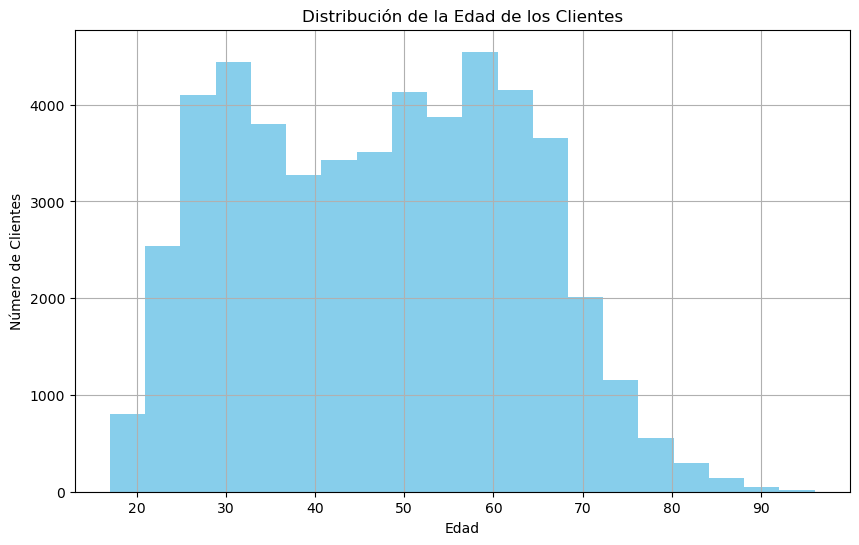

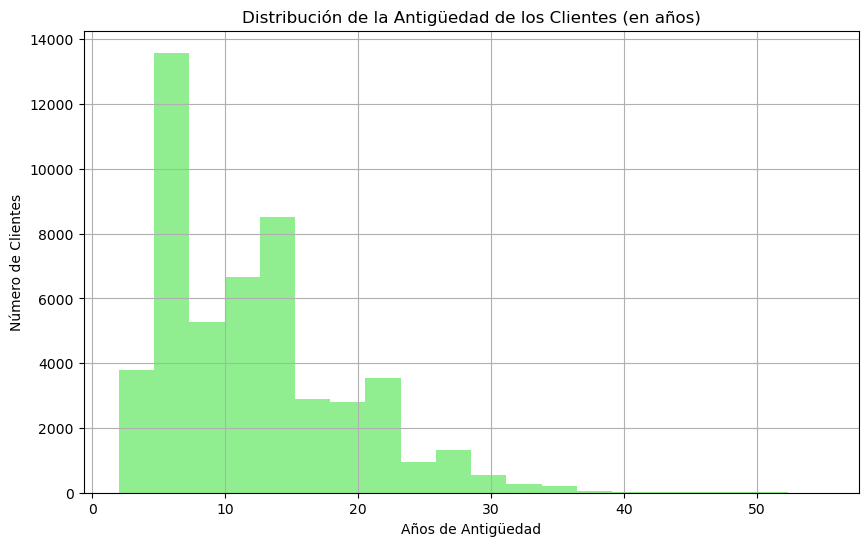

In [105]:
# Calcular métricas de tendencia central para edad y antigüedad
metrics = df_combined.agg({
    'clnt_age': ['mean', 'median', 'min', 'max'],
    'clnt_tenure_yr': ['mean', 'median', 'min', 'max']
})

# Mostrar las métricas
print("Métricas de edad y antigüedad:")
print(metrics)

# Graficar la distribución de la edad
plt.figure(figsize=(10, 6))
df_combined['clnt_age'].hist(bins=20, color='skyblue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Número de Clientes')
plt.show()

# Graficar la distribución de la antigüedad del cliente
plt.figure(figsize=(10, 6))
df_combined['clnt_tenure_yr'].hist(bins=20, color='lightgreen')
plt.title('Distribución de la Antigüedad de los Clientes (en años)')
plt.xlabel('Años de Antigüedad')
plt.ylabel('Número de Clientes')
plt.show()




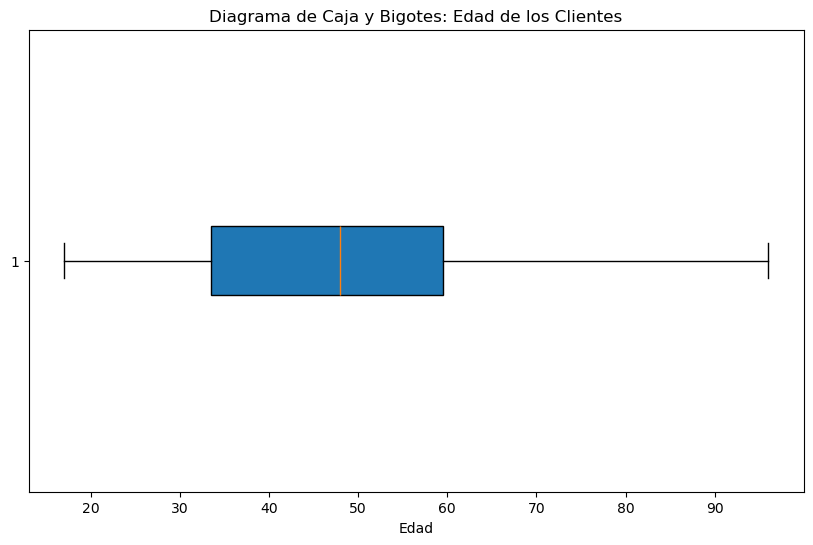

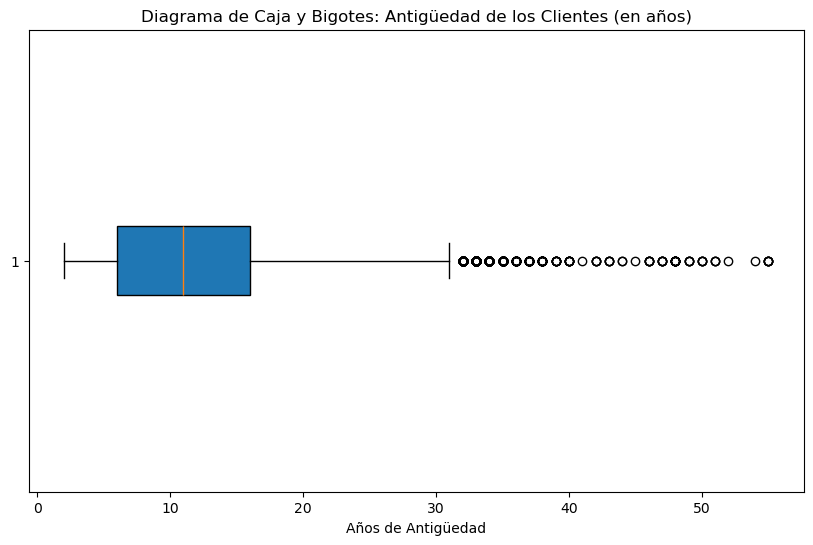

In [106]:
# Crear el boxplot para la distribución de la edad de los clientes
plt.figure(figsize=(10, 6))
plt.boxplot(df_combined['clnt_age'].dropna(), vert=False, patch_artist=True)
plt.title('Diagrama de Caja y Bigotes: Edad de los Clientes')
plt.xlabel('Edad')
plt.show()

# Crear el boxplot para la distribución de la antigüedad de los clientes (en años)
plt.figure(figsize=(10, 6))
plt.boxplot(df_combined['clnt_tenure_yr'].dropna(), vert=False, patch_artist=True)
plt.title('Diagrama de Caja y Bigotes: Antigüedad de los Clientes (en años)')
plt.xlabel('Años de Antigüedad')
plt.show()

In [107]:
# Obtener los cuartiles para la edad y la antigüedad
cuartiles_edad = df_combined['clnt_age'].quantile([0.25, 0.5, 0.75])
cuartiles_antiguedad = df_combined['clnt_tenure_yr'].quantile([0.25, 0.5, 0.75])

# Definir el rango intercuartil (25% al 75%) para la edad y la antigüedad
rango_edad_bajo = cuartiles_edad[0.25]
rango_edad_alto = cuartiles_edad[0.75]

rango_antiguedad_bajo = cuartiles_antiguedad[0.25]
rango_antiguedad_alto = cuartiles_antiguedad[0.75]

# Calcular cuántos clientes están en el rango intercuartil de edad
clientes_en_rango_edad = df_combined[(df_combined['clnt_age'] >= rango_edad_bajo) & (df_combined['clnt_age'] <= rango_edad_alto)]
porcentaje_edad = (len(clientes_en_rango_edad) / len(df_combined)) * 100

# Calcular cuántos clientes están en el rango intercuartil de antigüedad
clientes_en_rango_antiguedad = df_combined[(df_combined['clnt_tenure_yr'] >= rango_antiguedad_bajo) & (df_combined['clnt_tenure_yr'] <= rango_antiguedad_alto)]
porcentaje_antiguedad = (len(clientes_en_rango_antiguedad) / len(df_combined)) * 100

# Resultados
print(f"La mayoría de nuestros clientes (aproximadamente {porcentaje_edad:.2f}%) se encuentran en el rango de edad {rango_edad_bajo:.0f}-{rango_edad_alto:.0f} años.")
print(f"La mayoría de nuestros clientes (aproximadamente {porcentaje_antiguedad:.2f}%) tienen una antigüedad de {rango_antiguedad_bajo:.0f}-{rango_antiguedad_alto:.0f} años.")


La mayoría de nuestros clientes (aproximadamente 50.58%) se encuentran en el rango de edad 34-60 años.
La mayoría de nuestros clientes (aproximadamente 61.43%) tienen una antigüedad de 6-16 años.


In [108]:
# Mostrar las columnas del DataFrame df_combined
df_combined


,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


# Performance Metrics

In [103]:
df_final_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [111]:
# Contar valores únicos de 'client_id'
unique_client_ids = df_final_web_data['client_id'].nunique()

# Contar valores únicos de 'visitor_id'
unique_visitor_ids = df_final_web_data['visitor_id'].nunique()

# Contar valores únicos de 'visit_id'
unique_visit_ids = df_final_web_data['visit_id'].nunique()

# Resultados
print(f"Valores únicos de client_id: {unique_client_ids}")
print(f"Valores únicos de visitor_id: {unique_visitor_ids}")
print(f"Valores únicos de visit_id: {unique_visit_ids}")

Valores únicos de client_id: 120157
Valores únicos de visitor_id: 130236
Valores únicos de visit_id: 158095


In [116]:
# Filtrar df_final_web_data para quedarse solo con los client_id presentes en df_combined
df_filtered_web_data = df_final_web_data[df_final_web_data['client_id'].isin(df_combined['client_id'])]

# Verificar las primeras filas del DataFrame filtrado
df_filtered_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
637487,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27
637532,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17
637533,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31
637534,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23


In [119]:
# Contar valores únicos de 'client_id'
unique_client_ids = df_filtered_web_data['client_id'].nunique()

# Contar valores únicos de 'visitor_id'
unique_visitor_ids = df_filtered_web_data['visitor_id'].nunique()

# Contar valores únicos de 'visit_id'
unique_visit_ids = df_filtered_web_data['visit_id'].nunique()

# Resultados
print(f"Valores únicos de client_id: {unique_client_ids}")
print(f"Valores únicos de visitor_id: {unique_visitor_ids}")
print(f"Valores únicos de visit_id: {unique_visit_ids}")

Valores únicos de client_id: 50485
Valores únicos de visitor_id: 55992
Valores únicos de visit_id: 69181


In [128]:
# Paso 1: Unir df_filtered_web_data con df_combined usando client_id para obtener el grupo Test o Control
df_filtered_merged = pd.merge(df_filtered_web_data, df_combined[['client_id', 'variation']], on='client_id', how='left')

# Paso 2: Filtrar las visitas que han alcanzado el paso 'confirm'
df_confirm_visits = df_filtered_merged[df_filtered_merged['process_step'] == 'confirm']

# Paso 3: Calcular el Completion Rate para el grupo Test basado en 'visit_id'
total_test_visits = df_filtered_merged[df_filtered_merged['variation'] == 'Test']['visit_id'].nunique()
test_confirm_visits = df_confirm_visits[df_confirm_visits['variation'] == 'Test']['visit_id'].nunique()
completion_rate_test = (test_confirm_visits / total_test_visits) * 100

# Paso 4: Calcular el Completion Rate para el grupo Control basado en 'visit_id'
total_control_visits = df_filtered_merged[df_filtered_merged['variation'] == 'Control']['visit_id'].nunique()
control_confirm_visits = df_confirm_visits[df_confirm_visits['variation'] == 'Control']['visit_id'].nunique()
completion_rate_control = (control_confirm_visits / total_control_visits) * 100

# Resultados
print(f"Completion Rate para el grupo Test (por visit_id): {completion_rate_test:.2f}%")
print(f"Completion Rate para el grupo Control (por visit_id): {completion_rate_control:.2f}%")

Completion Rate para el grupo Test (por visit_id): 58.53%
Completion Rate para el grupo Control (por visit_id): 49.84%


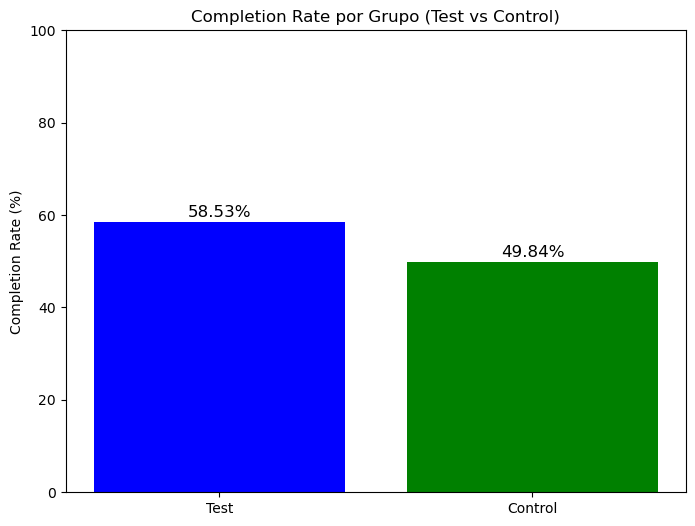

In [133]:
# Crear los datos para el gráfico
labels = ['Test', 'Control']
completion_rates = [completion_rate_test, completion_rate_control]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, completion_rates, color=['blue', 'green'])

# Añadir título y etiquetas
plt.title('Completion Rate por Grupo (Test vs Control)')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)  # Establecer límites de 0 a 100% para el eje Y

# Mostrar el porcentaje encima de cada barra
for i, rate in enumerate(completion_rates):
    plt.text(i, rate + 1, f'{rate:.2f}%', ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()


In [126]:
# Paso 1: Unir df_filtered_web_data con df_combined usando client_id para obtener el grupo Test o Control
df_filtered_merged = pd.merge(df_filtered_web_data, df_combined[['client_id', 'variation']], on='client_id', how='left')

# Paso 2: Filtrar los clientes que han alcanzado el paso 'confirm'
df_confirm_clients = df_filtered_merged[df_filtered_merged['process_step'] == 'confirm']

# Paso 3: Calcular el Completion Rate para el grupo Test basado en 'client_id'
total_test_clients = df_filtered_merged[df_filtered_merged['variation'] == 'Test']['client_id'].nunique()
test_confirm_clients = df_confirm_clients[df_confirm_clients['variation'] == 'Test']['client_id'].nunique()
completion_rate_test_clients = (test_confirm_clients / total_test_clients) * 100

# Paso 4: Calcular el Completion Rate para el grupo Control basado en 'client_id'
total_control_clients = df_filtered_merged[df_filtered_merged['variation'] == 'Control']['client_id'].nunique()
control_confirm_clients = df_confirm_clients[df_confirm_clients['variation'] == 'Control']['client_id'].nunique()
completion_rate_control_clients = (control_confirm_clients / total_control_clients) * 100

# Resultados
print(f"Completion Rate para el grupo Test (por client_id): {completion_rate_test_clients:.2f}%")
print(f"Completion Rate para el grupo Control (por client_id): {completion_rate_control_clients:.2f}%")


Completion Rate para el grupo Test (por client_id): 69.30%
Completion Rate para el grupo Control (por client_id): 65.58%


In [136]:
df_filtered_merged

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321182,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321183,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321184,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321185,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [137]:
df_filtered_merged.drop_duplicates()

,client_id,visitor_id,visit_id,process_step,date_time,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
321182,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
321183,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
321184,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
321185,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [135]:
# Filtrar las filas donde el 'process_step' es 'confirm'
df_confirm_steps = df_filtered_merged[df_filtered_merged['process_step'] == 'confirm']

# Contar cuántas veces cada 'client_id' aparece con el paso 'confirm'
client_confirm_counts = df_confirm_steps.groupby('client_id').size()

# Filtrar solo los client_id que tienen dos o más repeticiones del paso 'confirm'
client_confirm_2_or_more = client_confirm_counts[client_confirm_counts >= 2]

# Contar cuántos client_id tienen el paso 'confirm' dos veces o más
num_clients_confirm_2_or_more = len(client_confirm_2_or_more)

# Mostrar el resultado
print(f"Número de client_id que tienen el paso 'confirm' dos veces o más: {num_clients_confirm_2_or_more}")


Número de client_id que tienen el paso 'confirm' dos veces o más: 4915


In [140]:
#1 Quitar filas duplicadas de df_final_web_data
#2 Hacer ratios por client_id o por visit_id??
#3 Es correcto df_filtered_merged??

#